In [9]:
from qiskit.quantum_info import SparsePauliOp

ham_AB = SparsePauliOp.from_list([("ZI", -1047.42),("IZ" ,-1030.9) ,("XX",0.412), 
                                  ("YY", 0.412), ("ZZ", 0.412)])

In [10]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    pub = (ansatz, hamiltonian, params)
    cost = estimator.run([pub]).result()[0].data.evs

    return cost

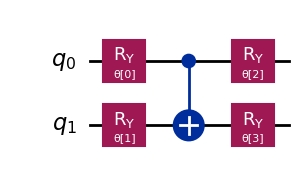

In [11]:
from qiskit.circuit.library import TwoLocal
from qiskit import QuantumCircuit

import numpy as np

#reference_circuit = QuantumCircuit(3)
#reference_circuit.x(0)
#reference_circuit.x(1)
#reference_circuit.x(2)



variational_form = TwoLocal(
    2,
    rotation_blocks=["ry"],
    entanglement_blocks="cx",
    entanglement="linear",
    reps=1,
)
#raw_ansatz = reference_circuit.compose(variational_form)
#raw_ansatz = reference_circuit
raw_ansatz = variational_form

raw_ansatz.decompose().draw('mpl')

In [12]:
from qiskit.primitives import StatevectorEstimator as Estimator
from qiskit.primitives import StatevectorSampler as Sampler
estimator = Estimator()
sampler = Sampler()

In [13]:
import numpy as np

x0 = np.ones(raw_ansatz.num_parameters)
print(x0)

[1. 1. 1. 1.]


In [14]:
# SciPy minimizer routine
from scipy.optimize import minimize
import time

start_time = time.time()

result = minimize(cost_func_vqe, x0, args=(raw_ansatz, ham_AB, estimator), method="COBYLA", options={'maxiter': 1000, 'disp': True})

end_time = time.time()
execution_time = end_time - start_time

Süre: 0.23509454727172852


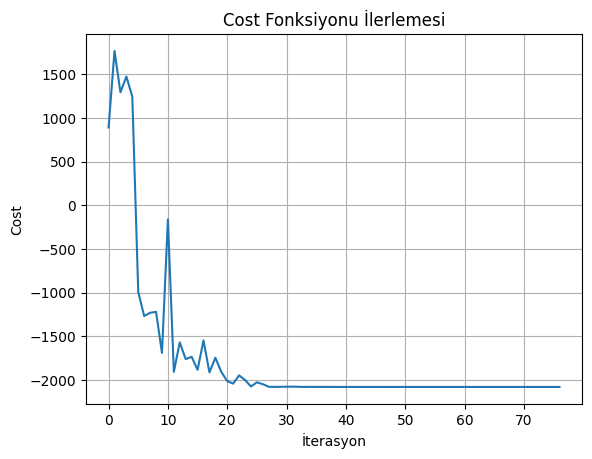

In [15]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import time

cost_history = []

def cost(x, *args):
    val = cost_func_vqe(x, *args)
    cost_history.append(val)
    return val

start_time = time.time()

result = minimize(
    cost,
    x0,
    args=(raw_ansatz, ham_AB, estimator),
    method="COBYLA",
    options={'maxiter': 1000, 'disp': True}
)

end_time = time.time()
print("Süre:", end_time - start_time)

result

plt.plot(cost_history)
plt.xlabel("İterasyon")
plt.ylabel("Cost")
plt.title("Cost Fonksiyonu İlerlemesi")
plt.grid(True)
plt.show()


In [17]:
result

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -2077.907994976085
       x: [ 5.488e-05  1.032e-01 -4.261e-05 -1.031e-01]
    nfev: 77
   maxcv: 0.0